In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.append('unfolding/')
from Application_functions import *
from geometry_functions import *
from functions_folding import *

#from Unfolding import *

bond_angles = np.radians(np.array([108.,120.]))
bonding_lengths = np.array([1.458,1.401])

In [3]:
#[tree, affected_vertices, hinges, connected_hinges] = hinges_traversed(dual_unfolding, graph_unfolding_faces, 0)

In [4]:
#dual_planar = draw_vertices_unfolding(dual_unfolding, graph_faces, 0, bond_angles, bonding_lengths)

In [5]:
#C60 = Unfolding(dual_unfolding, graph_unfolding_faces, graph_faces, graph_unfolding, neighbours, halogen_positions=halogen_positions, root_node=0, bonds_toBe=bonds_toBe, angles_f=angles_f)

In [6]:
#plot_graph(C60);

In [7]:
#from Unfolding import *
#Unfolding()
#dual_unfolding, graph_unfolding_faces, graph_faces, graph_unfolding, graph, halogen_positions, root_node, bonds_toBe, angles_f

In [8]:
graph       = [[1,4],[0,2],[5,3,1],[2,8,4],[3,11,0],[6,2],[7,5],[8,6],[9,3,7],[10,8],[8,11],[10,4]]
dual_graph  = [[1,2],[0,2],[0,1]]
faces       = [[1,2,3,4,0],[2,5,6,7,8,3],[3,8,9,10,11,4]] 

root_node = 0, root_face = [1, 2, 3, 4, 0]
The intersection of the two faces are: {2, 3}
The intersection of the two faces are: {3, 4}
dual hinges:  [[0, 1], [0, 2]]
cubic hinges: [[2, 3], [3, 4]]

hinges[0]: [[0, 1], [0, 2]] 
hinges[1]: [[2, 3], [3, 4]]
hinges[0]: [[0, 1], [0, 2]] 
hinges[1]: [[2, 3], [3, 4]]


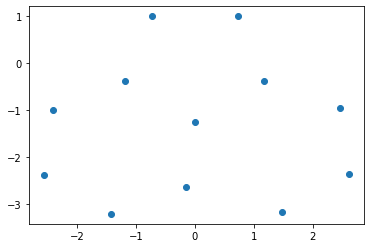

In [9]:
dual_planar = draw_vertices_unfolding(dual_graph, faces, 0, bond_angles, bonding_lengths)
plt.scatter(dual_planar[:,0],dual_planar[:,1])

In [10]:
def unit(a):
    return a / np.sqrt(np.sum(a**2))

In [11]:
def orient_axis(X):
    CD      = (dual_planar[4] - dual_planar[3]).reshape(3,1)
    e1      = np.array([1,0,0]).reshape(3,1)
    e2      = np.array([0,1,0]).reshape(3,1)
    e3      = np.array([0,0,1]).reshape(3,1)

    c3      = unit(CD)@e3.T
    c1      = (e1 - unit(CD)@(unit(CD).T@e1))@e1.T
    c2      = np.cross(unit(CD).reshape(3),unit((e1 - CD.T@e1).reshape(3))).reshape(3,1)@e2.T
    M       = c1 + c2 + c3
    dual_planar_transformed = np.array([M.T@i for i in dual_planar])
    return dual_planar_transformed

In [12]:
def rotate(X, axis, alpha):   
    # calculate all connecting vectors in the reference frame of the rotational axis
    origin = X[axis[0]]
    affected = [5,6,7,8]
    reference_vertices = X[affected] - origin
    
    # calculate the rotational axis
    rot_axis =  X[axis[1]] - X[axis[0]]
    
    # caluculate the rotational matrix
    rot_matrix = rotation_matrix(rot_axis, alpha)
    
    #rotate and update the 3D coordinates
    new_vertices =  np.dot(rot_matrix,reference_vertices.T).T
    X[affected] = origin + new_vertices
    return X
    

In [ ]:
def center_at(X,center_point=3):
    X -= X[center_point]
    return X

In [ ]:
def solve_system(X,b_old):


In [ ]:
def calculate_rotation(X,alpha):
    X           = center_at(X)
    X_new       = orient_axis(X)
    C_reference = np.copy(X_new[3])

    X_rotated   = rotate(X_new,[2,3],alpha)
    C_new       = X_rotated[3]
    if np.abs(C_new[3] - C_reference[3]) > 1e-6:
        print(f'Z components of the two differ by: {np.abs(C_new[3] - C_reference[3])}')
    sin_alpha   =  (c_new[3] - ) / () 
    cos_alpha   =

In [13]:
rotate(dual_planar,[2,3],np.deg2rad(90))

array([[-7.29000000e-01,  1.00338242e+00,  0.00000000e+00],
       [ 7.29000000e-01,  1.00338242e+00,  0.00000000e+00],
       [ 1.17954678e+00, -3.83257981e-01,  0.00000000e+00],
       [ 6.66133815e-16, -1.24024888e+00,  0.00000000e+00],
       [-1.17954678e+00, -3.83257981e-01,  0.00000000e+00],
       [ 1.74626318e+00,  2.84855885e-02,  1.21330159e+00],
       [ 1.17954678e+00, -3.83257981e-01,  2.42660318e+00],
       [ 4.61139687e-02, -1.20674512e+00,  2.42660318e+00],
       [-7.58414583e-01, -1.79126933e+00,  1.04114590e+00],
       [-1.42632156e+00, -3.20341209e+00,  0.00000000e+00],
       [-2.55975437e+00, -2.37992495e+00,  0.00000000e+00],
       [-2.41331000e+00, -9.86599777e-01,  0.00000000e+00]])

In [18]:
%matplotlib
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(dual_planar[:,0],dual_planar[:,1],dual_planar[:,2])

Using matplotlib backend: Qt5Agg


In [15]:
AC      = (dual_planar[3] - dual_planar[2]).reshape(3,1)
e1      = np.array([1,0,0]).reshape(3,1)
e2      = np.array([0,1,0]).reshape(3,1)
e3      = np.array([0,0,1]).reshape(3,1)

c3      = unit(AC)@e3.T
c1      = (e1 - unit(AC)@(unit(AC).T@e1))@e1.T
c2      = np.cross(unit(AC).reshape(3),unit((e1 - AC.T@e1).reshape(3))).reshape(3,1)@e2.T
M       = c1 + c2 + c3

In [16]:
dual_planar_transformed = np.array([M.T@i for i in dual_planar])

In [17]:
dual_planar_transformed

array([[-7.29000000e-01,  5.33012713e-01, -1.11022302e-16],
       [-2.25273389e-01,  1.64709986e-01, -1.17954678e+00],
       [ 5.89773389e-01, -4.31216343e-01, -7.29000000e-01],
       [ 5.89773389e-01, -4.31216343e-01,  7.29000000e-01],
       [-2.25273389e-01,  1.64709986e-01,  1.17954678e+00],
       [ 5.89773389e-01, -2.86736594e-01, -1.42950000e+00],
       [ 5.89773389e-01, -1.42256844e-01, -7.29000000e-01],
       [ 5.89773389e-01, -1.42256844e-01,  6.72000000e-01],
       [ 5.89773389e-01, -3.07236864e-01,  1.66645198e+00],
       [ 1.03053099e+00, -7.53478902e-01,  3.03683677e+00],
       [ 2.47348182e-01, -1.80850104e-01,  3.46976958e+00],
       [-3.64622024e-01,  2.66595575e-01,  2.53231760e+00]])

In [32]:
rot_matrix      = rotation_matrix(np.array([0.,0.,1.]), np.pi*2./3.)

l               = 1.
tetrahedron     = np.array([[0.,0.,0.]])
tetrahedron     = np.vstack([tetrahedron,tetrahedron[0] - np.array([1.,0,0])*l])
tetrahedron     = np.vstack([tetrahedron,rot_matrix@tetrahedron[1]])
tetrahedron     = np.vstack([tetrahedron,rot_matrix@tetrahedron[2]])



In [ ]:
def rotate(X, rot_axis, alpha):   
    # calculate all connecting vectors in the reference frame of the rotational axis
    reference_vertices = X[affected] - origin
    
    # calculate the rotational axis
    rot_axis =  X[axis[1]] - X[axis[0]]
    
    # caluculate the rotational matrix
    rot_matrix = rotation_matrix(rot_axis, alpha)
    
    #rotate and update the 3D coordinates
    new_vertices =  np.dot(rot_matrix,reference_vertices.T).T
    X[affected] = origin + new_vertices
    return X

In [34]:
%matplotlib
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(tetrahedron[:,0],tetrahedron[:,1],tetrahedron[:,2])

Using matplotlib backend: Qt5Agg


In [35]:
tetrahedron[2]  

array([[ 0.       ,  0.       ,  0.       ],
       [-1.       ,  0.       ,  0.       ],
       [ 0.5      , -0.8660254,  0.       ],
       [ 0.5      ,  0.8660254,  0.       ]])